In [461]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from packaging import version
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [462]:
path = 'dataset/1'

dfBikingRental = pd.read_csv(f'{path}/day.csv')

dfBikingRental.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
dfBikingRental[dfBikingRental['weathersit'] == 2]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
31,106,2011-04-16,2,0,4,0,6,0,3,21.54165,21.27460,88.8333,22.834136,121,674,795
78,292,2011-10-19,4,0,10,0,3,1,3,27.08695,25.69240,89.5217,16.303713,254,2170,2424
98,668,2012-10-29,4,1,10,0,1,1,3,22.00000,21.97000,88.0000,23.999400,2,20,22
99,90,2011-03-31,2,0,3,0,4,1,3,13.41665,12.87875,91.8333,14.582282,179,1506,1685
137,69,2011-03-10,1,0,3,0,4,1,3,19.45455,19.28340,0.0000,17.545759,46,577,623
151,726,2012-12-26,1,1,12,0,3,1,3,12.16665,11.01665,82.3333,21.208582,9,432,441
174,568,2012-07-21,3,1,7,0,6,0,3,29.79165,27.49560,86.5417,14.291100,1264,3195,4459
191,325,2011-11-21,4,0,11,0,1,1,3,22.37500,22.25310,91.0000,9.249618,220,2545,2765
192,341,2011-12-07,4,0,12,0,3,1,3,20.50000,20.01230,97.0417,17.833725,50,655,705
228,285,2011-10-12,4,0,10,0,3,1,3,27.16665,25.88585,90.6250,16.626050,217,2199,2416


In [464]:
## mnth, weekday, workingday, weathersit, windspeed(media), atemp by Y cnt
dfBikingRental = dfBikingRental.sample(frac=1).reset_index(drop=True)

# En el dataframe original, multiplicamos temp por 50, atemp por 50, hum por 100 y windspeed por 67
dfBikingRental["temp"] = dfBikingRental["temp"] * 50
dfBikingRental["atemp"] = dfBikingRental["atemp"] * 50
dfBikingRental["hum"] = dfBikingRental["hum"] * 100
dfBikingRental["windspeed"] = dfBikingRental["windspeed"] * 67

X = dfBikingRental[["mnth", "holiday", "yr", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed"]].values #características
y = dfBikingRental[["cnt"]].values  # etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


Mean Squared Error: 748009.0579481713
Root Mean Squared Error: 864.8751689973365
R2 Score: 0.7913495779187596
La prediccion  tiene un fallo  Cuadrático de : 864.88  


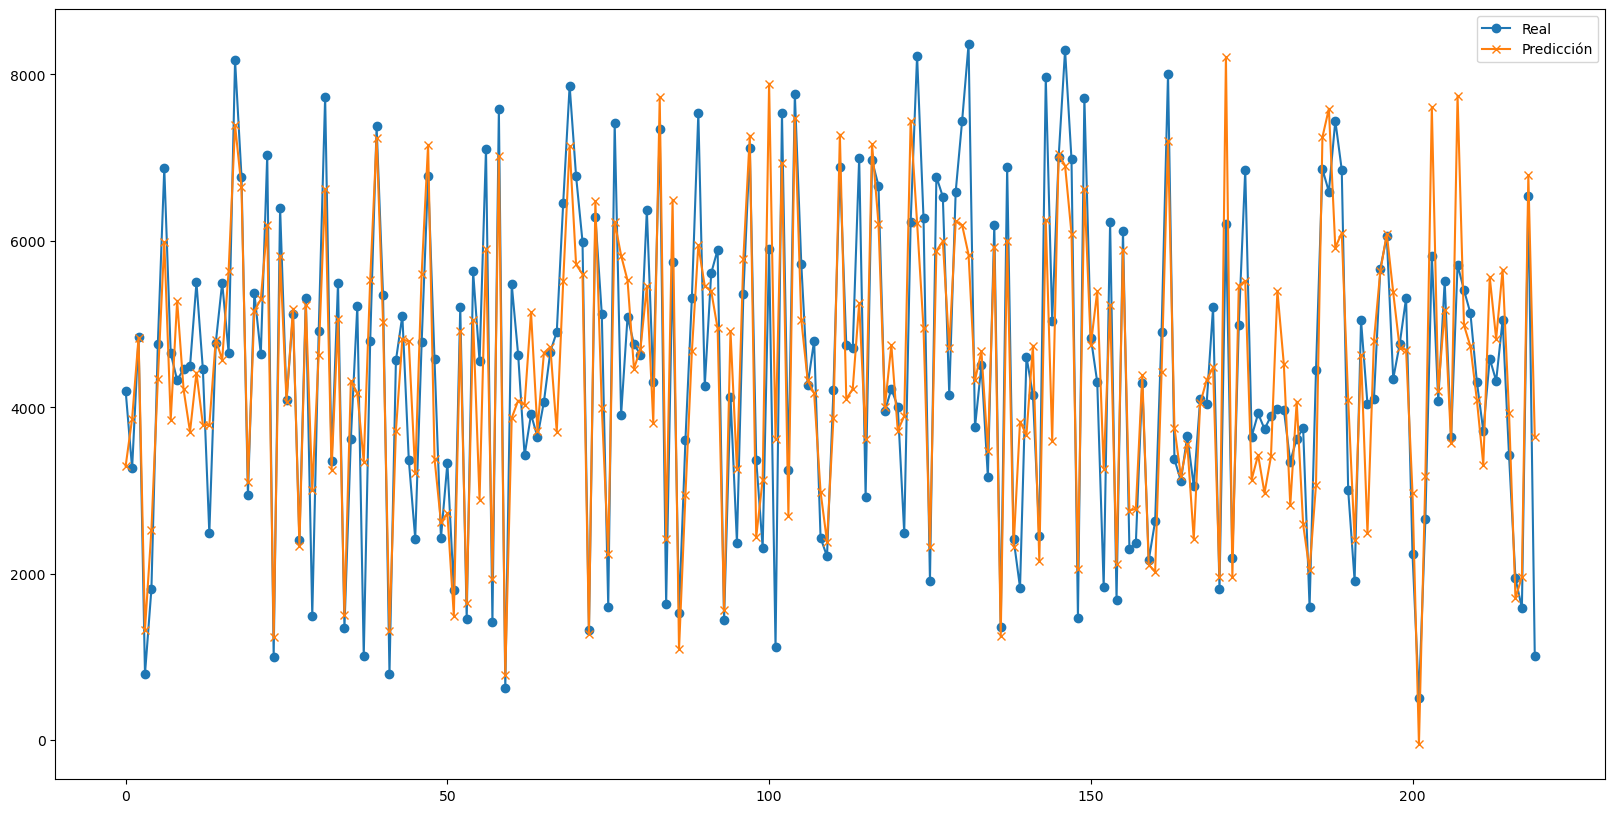

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Mean Squared Error:", mse)
print ("Root Mean Squared Error:", rmse)
print ("R2 Score:", r2)

print(f'La prediccion  tiene un fallo  Cuadrático de : {rmse:.2f}  ')

# Creamos un dataframe que cotenga todos los datos de test y las predicciones
df = pd.DataFrame({
    'mnth': X_test[:, 0].flatten(),
    'holiday': X_test[:, 1].flatten(),
    'yr': X_test[:, 2].flatten(),
    'weekday': X_test[:, 3].flatten(),
    'workingday': X_test[:, 4].flatten(),
    'weathersit': X_test[:, 5].flatten(),
    'temp': X_test[:, 6].flatten(),
    'hum': X_test[:, 7].flatten(),
    'windspeed': X_test[:, 8].flatten(),
    'Real': y_test.flatten(),
    'Prediccion': y_pred.flatten()
})

# Creamos una gráfica donde mostramos la predicción y el valor real
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Real'], label='Real', marker='o')
plt.plot(df.index, df['Prediccion'], label='Predicción', marker='x')
plt.legend()
plt.show()

In [473]:
df.tail(50)


,mnth,holiday,yr,weekday,workingday,weathersit,temp,hum,windspeed,Real,Prediccion
170,2.0,0.0,0.0,0.0,0.0,1.0,14.26085,40.7826,14.956745,1812,1956.584796
171,7.0,0.0,1.0,5.0,1.0,1.0,41.41665,45.0833,9.791514,6207,8208.678858
172,3.0,0.0,0.0,3.0,1.0,2.0,18.26085,77.6522,13.608839,2192,1956.057399
173,3.0,0.0,1.0,4.0,1.0,1.0,24.29165,61.5417,15.208129,4990,5461.853672
174,11.0,0.0,1.0,0.0,0.0,1.0,21.04165,65.9167,8.542500,6852,5518.784157
175,11.0,0.0,0.0,0.0,0.0,1.0,17.41665,73.4583,6.167631,3649,3131.665130
176,11.0,0.0,0.0,6.0,0.0,1.0,16.33335,51.9167,12.667154,3926,3428.922365
177,12.0,0.0,0.0,3.0,1.0,2.0,15.87500,66.3750,4.084206,3740,2969.387673
178,10.0,0.0,0.0,3.0,1.0,2.0,24.20835,72.0417,9.959014,3894,3410.169020
179,5.0,0.0,0.0,2.0,1.0,1.0,38.75000,63.6667,7.459043,3982,5400.413654
